In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

method
HTP      AxesSubplot(0.125,0.11;0.775x0.77)
SCOPE    AxesSubplot(0.125,0.11;0.775x0.77)
Name: time, dtype: object

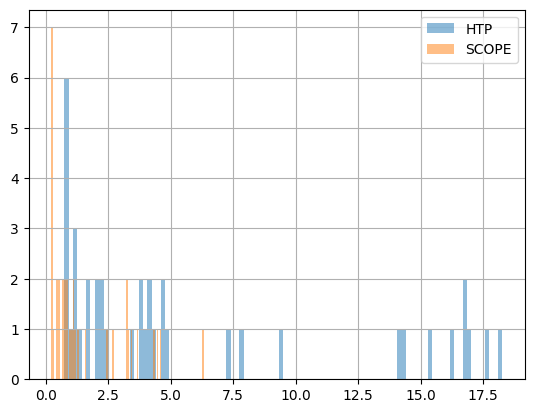

In [23]:
df = pd.read_csv("skscope_experiment-1.csv")
df.loc[
    (df["model"] != "linear")
    & ((df["method"] == "HTP") | (df["method"] == "SCOPE"))
    & (df["sample_size"] == 500)
].groupby("method")["time"].hist(bins=100, alpha=0.5, legend=True)

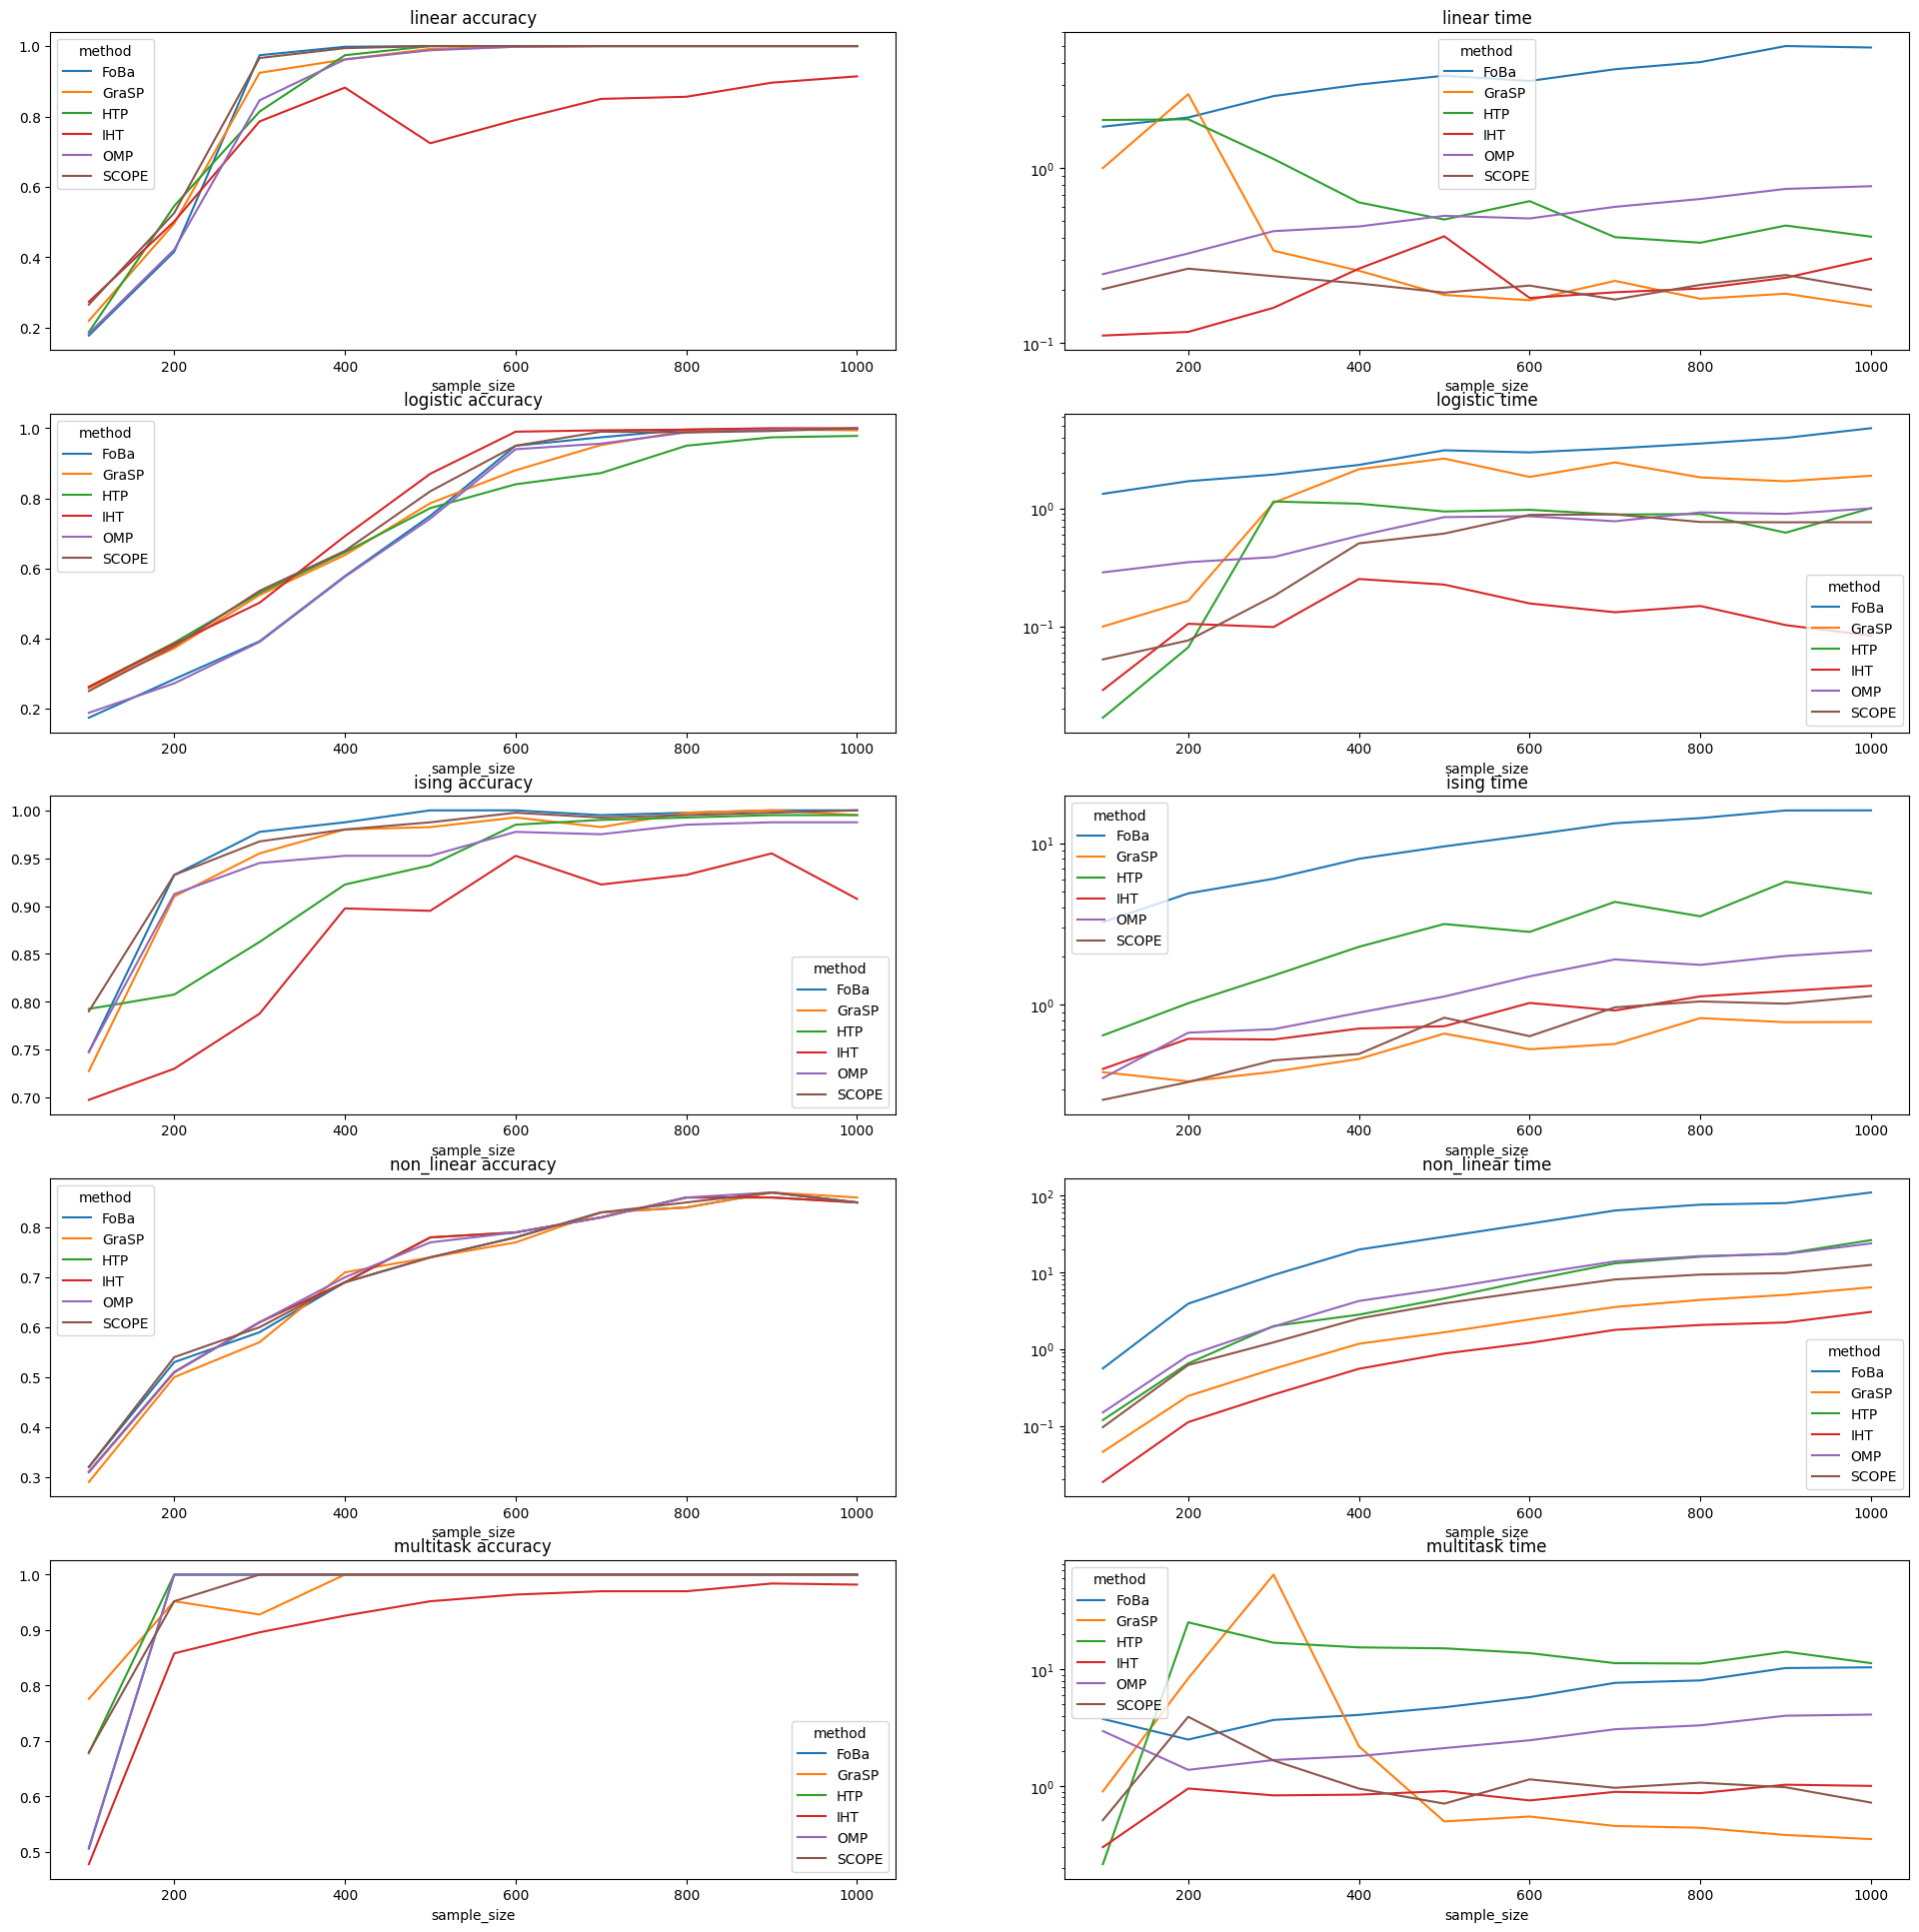

In [27]:
df = pd.read_csv("skscope_experiment-1.csv")
fig, axes = plt.subplots(5, 2, figsize=(24, 24))
for i, model in enumerate(["linear", "logistic", "ising", "non_linear", "multitask"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[(df["model"] == model)].groupby(["sample_size", "method"])[
            metric
        ].mean().unstack().plot(ax=axes[i][j], kind="line", title=model + " " + metric)
        # time: use log y
        if metric == "time":
            axes[i][j].set_yscale("log")

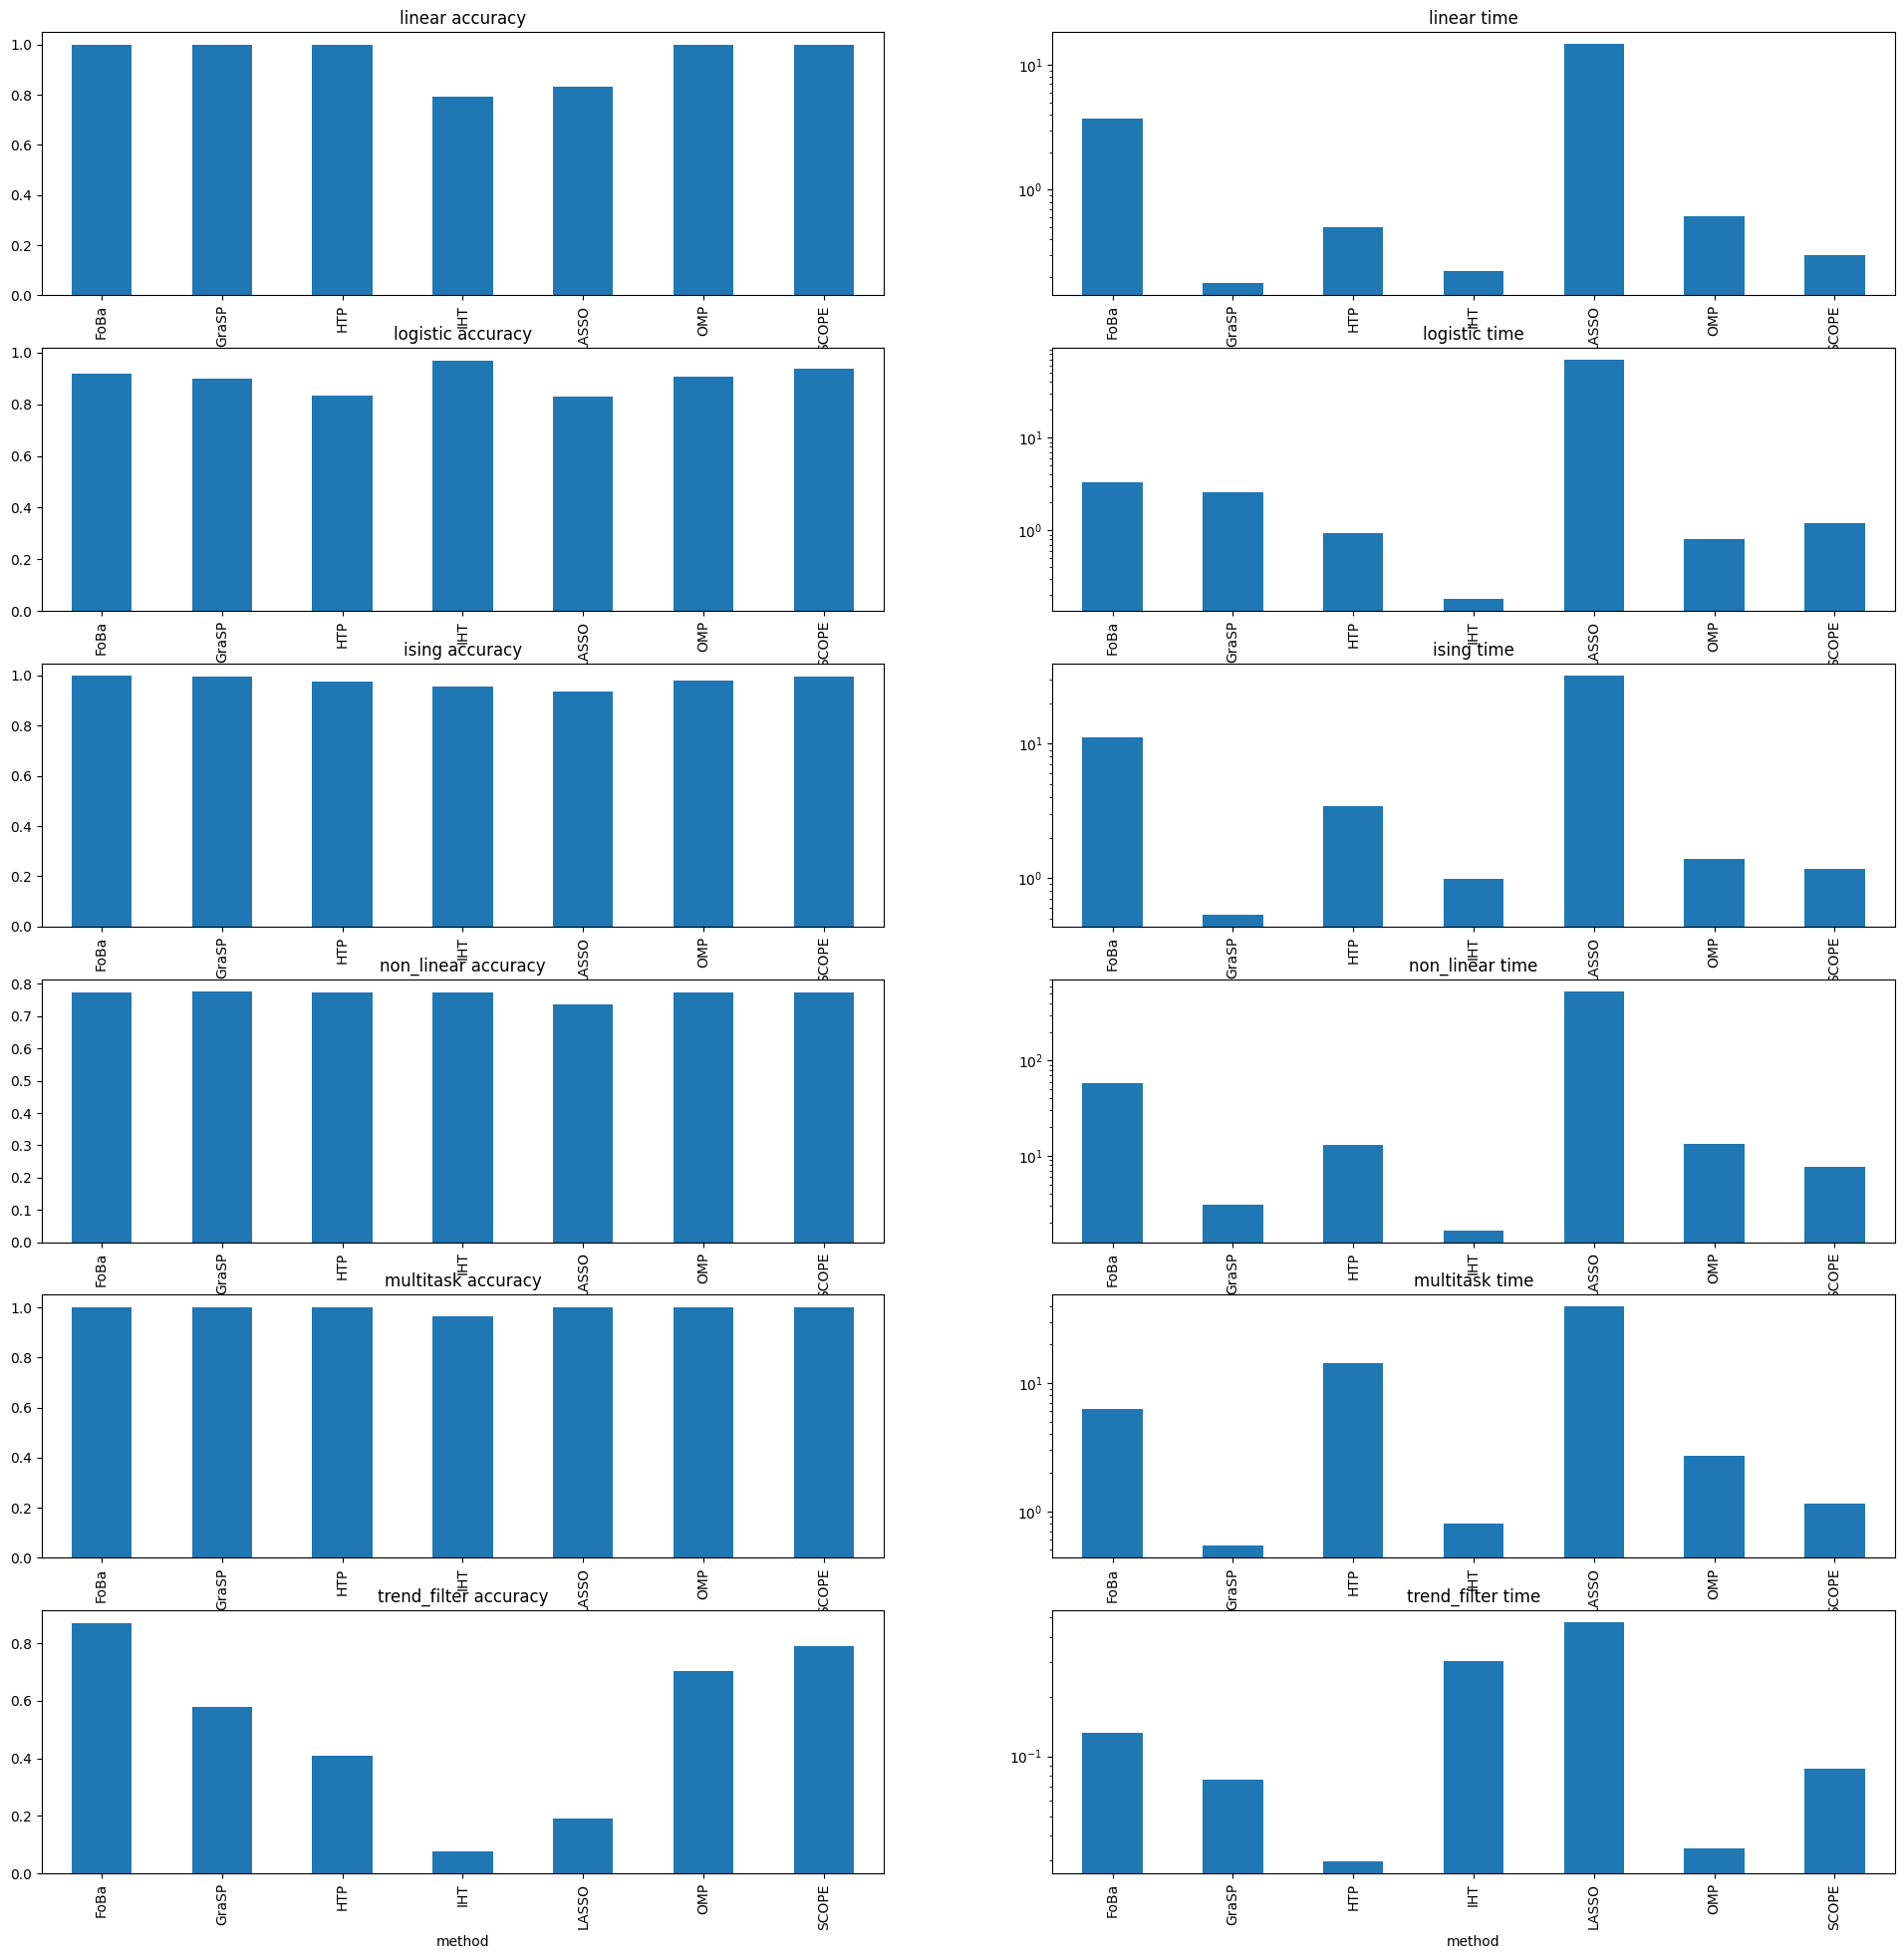

In [31]:
df = pd.read_csv("skscope_experiment-3.csv")
fig, axes = plt.subplots(6, 2, figsize=(24, 24))
for i, model in enumerate(["linear", "logistic", "ising", "non_linear", "multitask", "trend_filter"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[(df["model"] == model)].groupby("method")[
            metric
        ].mean().plot(ax=axes[i][j], kind="bar", title=model + " " + metric)
        # time: use log y
        if metric == "time":
            axes[i][j].set_yscale("log")

In [3]:
df = pd.read_csv("skscope_experiment-3.csv")

df.groupby(['method', 'model'])['accuracy'].mean().round(3).unstack().reset_index().iloc[[6,1,3,2,0,5,4]]

model,method,ising,linear,logistic,multitask,non_linear,trend_filter
6,SCOPE,0.996,1.000,0.936,1.000,0.773,0.790
1,GraSP,0.994,0.999,0.898,1.000,0.776,0.580
3,IHT,0.955,0.792,0.970,0.966,0.775,0.076
2,HTP,0.974,1.000,0.835,1.000,0.775,0.408
0,FoBa,0.998,1.000,0.918,1.000,0.772,0.870
5,OMP,0.980,0.998,0.909,1.000,0.774,0.702
4,LASSO,0.937,0.833,0.830,1.000,0.738,0.190


In [17]:
df = pd.read_csv("skscope_experiment_jit.csv")
df[df.jit == True].groupby(['method', 'model'])['time'].apply(
    lambda x: str(x.mean().round(2)) + "(" + str(x.std().round(2)) + ")"
).unstack().reset_index().iloc[[4,3,2,1,0,5], [0,2,3,6,4,1,5]]

model,method,linear,logistic,trend_filter,multitask,ising,non_linear
4,OMP,2.45(0.68),1.66(0.67),1.6(0.65),4.07(0.48),2.86(0.86),11.53(3.61)
3,IHT,3.42(0.88),1.06(0.67),2.8(1.35),1.24(0.23),3.24(1.43),6.37(2.32)
2,HTP,4.14(1.25),2.37(0.92),1.71(0.85),21.5(4.56),5.26(2.03),10.82(7.86)
1,GraSP,1.16(0.38),12.7(8.2),1.74(0.74),0.87(0.31),1.02(0.44),7.34(2.75)
0,FoBa,11.7(2.9),6.31(2.15),1.89(0.84),6.65(0.65),11.59(3.55),31.26(8.8)
5,SCOPE,2.11(0.7),3.24(2.67),2.85(1.29),7.28(4.84),1.69(0.67),8.6(2.7)


In [10]:
df = pd.read_csv("skscope_experiment_jit.csv")

df = df.pivot(
    index=['model', 'seed', 'method'],
    columns='jit',
    values='time',
).reset_index()

df['acceleration'] = df[False] / df[True]

In [18]:
print(df.groupby(['method', 'model'])['acceleration'].mean().unstack().round(2).reset_index().to_markdown())

|    | method   |   ising |   linear |   logistic |   multitask |   non_linear |   trend_filter |
|---:|:---------|--------:|---------:|-----------:|------------:|-------------:|---------------:|
|  0 | FoBa     |   14.76 |    11.93 |      19.16 |        7.02 |         4.32 |           2.97 |
|  1 | GraSP    |   10.34 |     5.76 |      31.63 |        6.73 |         1.07 |           1.81 |
|  2 | HTP      |   13.26 |     5.34 |      13.55 |       11.16 |         1.21 |           0.89 |
|  3 | IHT      |    4.89 |     1.06 |       3.28 |        1.84 |         0.53 |           0.25 |
|  4 | OMP      |   16.16 |    11.33 |      20.88 |        9.82 |         2.83 |           0.9  |
|  5 | SCOPE    |   11.21 |     5.24 |      17.26 |        2.06 |         2.01 |           3.21 |


|          |   Ising model |   Linear regression |   Logistic regression |   Multi-task learning |   Nonlinear feature selection |   Trend filtering |
|:---------|--------:|---------:|-----------:|------------:|-------------:|---------------:|
| FobaSolver     |   14.76 |    11.93 |      19.16 |        7.02 |         4.32 |           2.97 |
| GraspSolver    |   10.34 |     5.76 |      31.63 |        6.73 |         1.07 |           1.81 |
| HTPSolver      |   13.26 |     5.34 |      13.55 |       11.16 |         1.21 |           0.89 |
| IHTSolver      |    4.89 |     1.06 |       3.28 |        1.84 |         0.53 |           0.25 |
| OMPSolver      |   16.16 |    11.33 |      20.88 |        9.82 |         2.83 |           0.9  |
| ScopeSolver    |   11.21 |     5.24 |      17.26 |        2.06 |         2.01 |           3.21 |

\begin{table}[htbp]
  \vspace*{-0.35cm}
  \begin{center}
    {\small
    \begin{tabular}{c|cc|cc|cc}
      \toprule
      Method & \multicolumn{2}{c|}{Linear regression}     & \multicolumn{2}{c|}{Logistic regression} & \multicolumn{2}{c}{Trend filtering} \\ \cline{2-7} 
      & JIT time           & non-JIT time            & JIT time          & non-JIT time           & JIT time           & non-JIT time             \\ \hline
      OMPSolver               &  2.45(0.68) &    26.74(5.99) &  1.66(0.67) &    32.78(10.32) &    1.6(0.65) &  1.43(0.68) \\
      IHTSolver               &  3.42(0.88) &     3.54(1.11) &  1.06(0.67) &      3.59(3.77) &    2.8(1.35) &  0.68(0.35) \\
      HTPSolver               &  4.14(1.25) &     21.7(8.55) &  2.37(0.92) &    32.13(17.28) &   1.71(0.85) &  1.46(0.82) \\
      GraspSolver             &  1.16(0.38) &     6.57(2.35) &   12.7(8.2) &  408.14(246.79) &   1.74(0.74) &  3.14(1.95) \\
      FobaSolver              &   11.7(2.9) &  132.04(17.53) &  6.31(2.15) &   116.23(33.13) &   1.89(0.84) &  5.46(2.24) \\
      ScopeSolver             &   2.11(0.7) &    10.73(3.36) &  3.24(2.67) &    53.88(38.12) &   2.85(1.29) &  8.93(3.54) \\
      \midrule
      Method & \multicolumn{2}{c|}{Multi-task learning} & \multicolumn{2}{c|}{Ising model}    & \multicolumn{2}{c}{Nonlinear feature selection}   \\ \cline{2-7} 
      & JIT time           & non-JIT time            & JIT time          & non-JIT time           & JIT time           & non-JIT time             \\ \hline
      OMPSolver               &  4.07(0.48) &     39.8(5.22) &   2.86(0.86) &   45.64(14.47) &  11.53(3.61) &   32.61(10.47) \\
      IHTSolver               &  1.24(0.23) &     2.26(0.49) &   3.24(1.43) &    15.23(5.69) &   6.37(2.32) &     3.36(2.06) \\
      HTPSolver               &  21.5(4.56) &  235.89(64.94) &   5.26(2.03) &   70.71(34.32) &  10.82(7.86) &    12.61(8.33) \\
      GraspSolver             &  0.87(0.31) &     5.95(2.75) &   1.02(0.44) &    10.62(5.77) &   7.34(2.75) &     7.65(3.05) \\
      FobaSolver              &  6.65(0.65) &    46.59(6.96) &  11.59(3.55) &  165.58(42.08) &   31.26(8.8) &  132.27(32.48) \\
      ScopeSolver             &  7.28(4.84) &    14.02(9.26) &   1.69(0.67) &    18.65(7.79) &     8.6(2.7) &    17.03(5.52) \\
      \bottomrule
    \end{tabular}
    }
  \end{center}
\end{table}

In [14]:
from functools import reduce
def make_table(grid):
    cell_width = 2 + max(reduce(lambda x,y: x+y, [[len(item) for item in row] for row in grid], []))
    num_cols = len(grid[0])
    rst = table_div(num_cols, cell_width, 0)
    header_flag = 1
    for row in grid:
        rst = rst + '| ' + '| '.join([normalize_cell(x, cell_width-1) for x in row]) + '|\n'
        rst = rst + table_div(num_cols, cell_width, header_flag)
        header_flag = 0
    return rst

def table_div(num_cols, col_width, header_flag):
    if header_flag == 1:
        return num_cols*('+' + (col_width)*'=') + '+\n'
    else:
        return num_cols*('+' + (col_width)*'-') + '+\n'

def normalize_cell(string, length):
    return string + ((length - len(string)) * ' ')

print(make_table([['Name', 'Favorite Food', 'Favorite Subject'],
                     ['Joe', 'Hamburgers', 'Cars'],
                     ['Jill', 'Salads', 'American Idol'],
                     ['Sally', 'Tofu', 'Math']]))

+------------------+------------------+------------------+
| Name             | Favorite Food    | Favorite Subject |
+==================+==================+==================+
| Joe              | Hamburgers       | Cars             |
+------------------+------------------+------------------+
| Jill             | Salads           | American Idol    |
+------------------+------------------+------------------+
| Sally            | Tofu             | Math             |
+------------------+------------------+------------------+

